Time elapsed is 20.462363 seconds


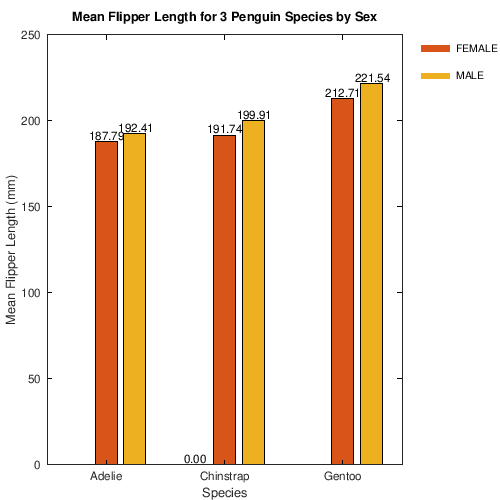

In [2]:
% Start the timer
tic;

% Open the file
fid = fopen('data/penguins.csv');

% Read the data
data = textscan(fid, '%s %*s %*s %*s %f %*s %s', 'Delimiter', ',', 'HeaderLines', 1);

% Close the file
fclose(fid);

% Extract the relevant columns
species = data{1};
flipper_length = data{2};
sex = data{3};

% Convert species and sex to numeric indices
[species_labels,~,species] = unique(species);
[sex_labels,~,sex] = unique(sex);

% Calculate the mean flipper length for each species and sex
mean_data = accumarray([species, sex], flipper_length, [], @mean);

% Reshape the data into a matrix for plotting
mean_data = reshape(mean_data, [max(species), max(sex)]);

% Create a new figure with specified width and height
figure('Position', [0 0 500 500])

% Create a grouped bar chart
h = bar(mean_data);

% Set the title and labels
title('Mean Flipper Length for 3 Penguin Species by Sex')
xlabel('Species')
ylabel('Mean Flipper Length (mm)')

% Set the x-axis tick labels to the species names
set(gca, 'XTickLabel', species_labels)

% Add a legend and move it to the northeast corner
legend(h, sex_labels, 'location', 'northeastoutside')

legend boxoff

% Add labels to the bars
for i = 1:size(mean_data, 1)
    for j = 1:size(mean_data, 2)
        % Adjust the x-position based on the index of the sex
        x_pos = i - 0.5 + j/(size(mean_data, 2)+1);
        text(x_pos, mean_data(i, j), num2str(mean_data(i, j), '%.2f'), ...
             'HorizontalAlignment', 'center', 'VerticalAlignment', 'bottom')
    end
end

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);